## Simulating AR(1) Process
$X_t = ar \times X_{t-1} + w_t$ \\



In [45]:
from numpy.random import default_rng
import numpy as np
rng = default_rng(12345)
import pandas as pd
import plotly.express as px

n_points = 200
ar_factor = 0.4
w_std = 1.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2020-06-20,2020-06-20,0.000000
2020-06-21,2020-06-21,-1.423825
2020-06-22,2020-06-22,0.694198
2020-06-23,2020-06-23,-0.592982
2020-06-24,2020-06-24,-0.496366
...,...,...
2021-01-01,2021-01-01,0.054771
2021-01-02,2021-01-02,0.708091
2021-01-03,2021-01-03,1.498241
2021-01-04,2021-01-04,0.815356


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



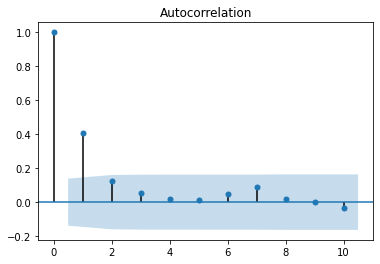

[ 1.          0.40609994  0.12695332  0.05637062  0.02111476  0.01047123
  0.04768944  0.0906943   0.01815752  0.00104003 -0.0370855 ]


In [46]:
from statsmodels.tsa.stattools import  acf, pacf
from statsmodels.graphics import tsaplots # time series plots
from statsmodels.tsa.stattools import  acf
import matplotlib.pyplot as plt


nlag = 10
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

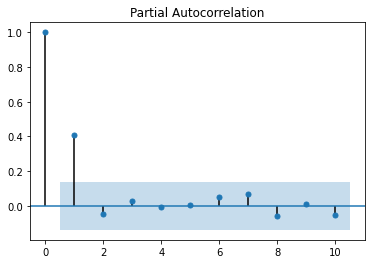

[ 1.          0.40814064 -0.04600687  0.02556368 -0.00732522  0.00493688
  0.05215059  0.06548567 -0.05745029  0.0095446  -0.0511386 ]


In [47]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = 10)
plt.show()
print(result)